# Введение в регрессионный анализ

## Необязательное домашнее задание №1

*Алла Тамбовцева*

В задачах 1-2 предлагается поработать с файлом `sentiment.csv`, с которым мы работали на семинаре 1.

Показатели в файле:

* `Text`: текст поста;
* `Sentiment`: эмоциональная окраска поста (значения `Positive` и `Negative`);
* `Timestamp`: время публикации поста;
* `User`: имя пользователя;
* `Platform`: платформа (значения `Facebook`, `Instagram`, `Twitter`*);
* `Hashtags`: хэштеги;
* `Retweets`: число репостов;
* `Likes`: число лайков;
* `Country`: страна пользователя;
* `Year`: год публикации поста;
* `Month`: месяц публикации поста;
* `Day`: день публикации поста;
* `Hour`: час публикации поста.

*все три платформы запрещены в РФ.

### Задача 1. Утро добрым не бывает

Так как число лайков, поставленных постам в социальных сетях, зависит, в том числе, от числа просмотров, логично предположить, что утренние посты получают меньше лайков, так как в небольшом промежутке времени после публикации их читает меньшее число пользователей (утром не все ещё проснулись или заняты сборами на работу/на учёбу). Так ли это на самом деле? Подумайте, какие факты можно предложить 
в качестве контраргументов этому утверждению. 

А теперь давайте проверим, можно ли считать среднее число лайков одинаковым у утренних и не-утренних постов.

1. Загрузите данные из файла `sentiment.csv` и сохраните его в датафрейм.
2. Выберите из датафрейма строки, которые соответствуют постам, опубликованным в утреннее время (до 12:00, см. столбец `Hour`), и сохраните их в датафрейм `morning`. Выберите из датафрейма строки, которые соответствуют постам, опубликованным в дневное и вечернее время (с 12:00 и далее), и сохраните их в датафрейм `day`. 
3. Выведите описательные статистики для числовых столбцов датафрейма `morning`. Проделайте то же для `day`. Каких постов, утренних или не-утренних, больше в имеющихся данных? В какое время дня посты получают больше лайков? 
4. Используя критерий Стьюдента для двух выборок, проверьте, считая уровень доверия равным 0.95, можно ли считать среднее число лайков у утренних и не-утренних постов одинаковым.

In [1]:
import pandas as pd
from scipy import stats

In [2]:
dat = pd.read_csv("sentiment.csv")
morning = dat[dat["Hour"] < 12]
day = dat[dat["Hour"] >= 12]

In [3]:
morning.describe()

,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,172.706897,19.206897,38.500000,2020.637931,4.120690,16.379310,9.275862
std,144.090981,6.737584,13.374826,3.364929,3.788614,8.313649,2.117538
min,1.000000,5.000000,10.000000,2012.000000,1.000000,1.000000,0.000000
25%,56.500000,15.000000,30.000000,2019.000000,1.250000,11.000000,9.000000
50%,119.500000,20.000000,40.000000,2023.000000,2.000000,15.500000,10.000000
75%,307.250000,22.000000,45.000000,2023.000000,6.750000,22.750000,11.000000
max,596.000000,35.000000,70.000000,2023.000000,12.000000,31.000000,11.000000


In [4]:
day.describe()

,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,421.138577,21.988764,43.752809,2021.468165,6.138577,16.164794,16.767790
std,243.140418,6.765394,13.519644,2.243185,3.426935,8.815730,2.812167
min,0.000000,7.000000,15.000000,2015.000000,1.000000,1.000000,12.000000
25%,193.000000,18.000000,35.000000,2020.000000,3.000000,10.000000,14.000000
50%,481.000000,22.000000,44.000000,2023.000000,7.000000,16.000000,17.000000
75%,639.500000,25.000000,50.000000,2023.000000,9.000000,23.000000,19.000000
max,731.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [5]:
# выборочное среднее для Likes у утренних постов ниже
# статистика критерия попадает в крит область,
# H0 о равенстве математических ожиданий отвергается

stats.ttest_ind(morning["Likes"], day["Likes"])

Ttest_indResult(statistic=-2.6870292223141394, pvalue=0.007582218089244583)

### Задача 2. Кто популярнее?

Ниже приведены два массива значений, в первом из них – выборка числа лайков, поставленных постам, опубликованных пользователями из США, во втором – выборка числа лайков, поставленных постам пользователей из Канады:

In [6]:
import numpy as np

us = np.array([30, 40, 30, 45, 55, 40, 30, 60, 45, 60, 50, 35, 60, 50, 30, 40, 35,
       60, 40, 40, 50, 40, 40, 35, 45, 30, 60, 30, 40, 50, 50, 50, 50, 80,
       70, 70, 55, 45, 70, 80, 35, 70, 30, 45, 40, 45, 70, 40, 70, 50, 60,
       50, 40, 50, 40, 60, 50, 45, 55, 40, 50, 40, 30, 36, 40, 37, 39, 48,
       50, 44, 48, 47, 60, 15, 30, 35, 30, 35, 20, 25, 15, 32, 40, 40, 40,
       55, 70, 40, 28, 34, 44, 35, 50, 32, 48])

canada = np.array([20, 30, 25, 25, 30, 25, 35, 30, 45, 50, 45, 45, 45, 30, 44, 35, 30,
       40, 45, 70, 80, 80, 70, 45, 55, 35, 45, 45, 55, 45, 55, 60, 35, 60,
       60, 45, 55, 40, 50, 48, 39, 52, 48, 38, 45, 51, 42, 10, 15, 40, 40,
       30, 15, 20, 15, 20, 15, 30, 50, 30, 70, 45, 50, 35, 45, 36, 41, 31,
       39, 42, 36, 43])

1. Реализуйте критерий Стьюдента для двух выборок, используя приведенные выше выборки и функцию `ttest_ind()` из модуля `stats`. Проинтерпретируйте полученные результаты.
2. Вычислите, используя соответствующие методы, средние арифметические выборок (сохраните их как `mean1` и `mean2`) и выборочные стандартные отклонения (сохраните их как `std1` и `std2`). Определите число элементов в выборках и сохраните их как `nobs1` и `nobs2`.
3. Реализуйте критерий Стьюдента для двух выборок, используя статистики из предыдущего пункта и функцию `ttest_ind_from_stats()` из модуля `stats`. На вход эта функция принимает перечень готовых описательных статистик для двух групп:

        ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)
        
4. Сравните результаты пунктов 1 и 3. Если они отличаются, проверьте, верно ли вы посчитали стандартные отклонения. 
5. Используя данные, полученные в пункте 3, вычислите наблюдаемое значение статистики критерия по формуле, предложенной на лекции. Сравните ответ с результатами пунктов 1 и 3.

In [7]:
# H0 не отвергается, средние равны
stats.ttest_ind(us, canada)

Ttest_indResult(statistic=1.6935236392925344, pvalue=0.09224281962597743)

In [8]:
mean1 = us.mean()
mean2 = canada.mean()
std1 = us.std(ddof=1)
std2 = canada.std(ddof=1)
nobs1 = us.size
nobs2 = canada.size

# все совпадает
stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)

Ttest_indResult(statistic=1.6935236392925344, pvalue=0.09224281962597743)

In [9]:
s = np.sqrt((std1 ** 2 * (nobs1 - 1) + std2 ** 2 * (nobs2 - 1)) / (nobs1 + nobs2 - 2))
t_obs = (mean1 - mean2) / (s * np.sqrt(1 / nobs1 + 1 / nobs2))

# все совпадает
print(t_obs)

1.6935236392925344


### Задача 3*. Угадай регрессию

В библиотеке `numpy` есть модуль `random`, который позволяет генерировать случайные числа или выбирать случайным образом элементы из какого-нибудь перечня. Так, мы можем написать простой код, который будет случайным образом извлекать целое число от 1 до 20:

In [10]:
import numpy as np

# у каждого свое случайное число
np.random.choice(range(1, 21))

3

Напишем простую игру, которая будет заключаться в следующем: пользователю показывается график прямой $y = b_0 + b_1x$, а он должен указать значения коэффициентов $b_0$ и $b_1$. Для гуманности все коэффициенты будут целыми числами из диапазона от -3 до 3. 
Загадать два числа несложно:

In [11]:
# берем range(), превращаем в список и выкидываем 0
interval = list(range(-3, 4))
interval.remove(0)

b0 = np.random.choice(interval)
b1 = np.random.choice(interval)

Прямую можно построить по двум точкам. Создадим массив `x` из значений -2 и 2 и получим массив `y`, пользуясь уравнением прямой:

In [12]:
x = np.array([-2, 2])
y = b0 + b1 * x
print(x, y)

[-2  2] [ 3 -1]


Чтобы не вызывать сейчас отдельный модуль для графики, сохраним все в датафрейм по аналогии с семинаром 1:

In [13]:
import pandas as pd
df = pd.DataFrame({"x" : x, "y" : y})
df

,x,y
0,-2,3
1,2,-1


Построим график:

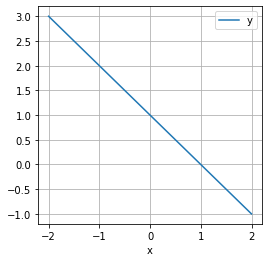

In [14]:
# figsize – размер графика в дюймах, grid – координатная сетка
df.plot("x", "y", grid = True, figsize = (4, 4));

По такому графику не всегда удобно определять коэффициенты. Давайте добавим побольше засечек. По оси x в любом случае достаточно будет взять целые значения от -2 до 2 (в `x` эти границы), а вот по оси y значения зависят от того, какие коэффициенты загадал Python. Поэтому в `range()` для гарантии результата поместим минимальное и максимальное значение из `y`:

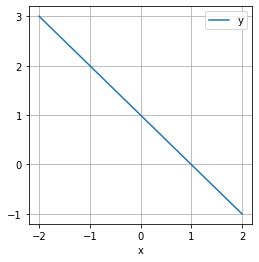

In [15]:
# сохраняем график в переменную ax
# добавляем в него засечки (ticks) по оси x и y

ax = df.plot("x", "y", grid = True, figsize = (4, 4));
ax.set_xticks(range(-2, 3));
ax.set_yticks(range(min(y), max(y) + 1));

Готово! По графику можно определить значение $b_0$ (значение $y$ при $x=0$) и значение $b_1$ (коэффициент угла наклона). Проверим себя и посмотрим, что загадал Python:

In [16]:
print(b0, b1)

1 -1


Так и есть! Итого, если собрать весь код в одну программу, получаем:

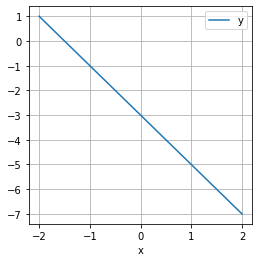

In [17]:
import numpy as np
import pandas as pd

interval = list(range(-3, 4))
interval.remove(0)

b0 = np.random.choice(interval)
b1 = np.random.choice(interval)

x = np.array([-2, 2])
y = b0 + b1 * x
df = pd.DataFrame({"x" : x, "y" : y})

ax = df.plot("x", "y", grid = True, figsize = (4, 4));
ax.set_xticks(range(-2, 3));
ax.set_yticks(range(min(y), max(y) + 1));

In [18]:
print(b0, b1)

-3 -2


Самый главный код готов, его можно повторно запускать и проверять себя через `print(b0, b1)`. Игру можно сделать более интересной, например, написать цикл, который будет повторять код 10 раз, запрашивать с клавиатуры значения коэффициентов, сравнивать их с `b0` и `b1` и за верные ответы начислять баллы.

**Примечание:** `matplotlib` нужен, чтобы выводить график на экран в цикле (`plt.show()`).  

In [ ]:
from matplotlib import pyplot as plt

points = 0

for i in range(0, 10):
    
    interval = list(range(-3, 4))
    interval.remove(0)

    b0 = np.random.choice(interval)
    b1 = np.random.choice(interval)

    x = np.array([-2, 2])
    y = b0 + b1 * x
    df = pd.DataFrame({"x" : x, "y" : y})

    ax = df.plot("x", "y", grid = True, figsize = (4, 4));
    ax.set_xticks(range(-2, 3));
    ax.set_yticks(range(min(y), max(y) + 1));
    plt.show()
    
    answer_b0 = float(input("Enter b0:"))
    answer_b1 = float(input("Enter b1:"))
    
    if answer_b0 == b0:
        points += 1
    else:
        print("Incorrect b0")
        
    if answer_b1 == b1:
        points += 1
    else:
        print("Incorrect b1")
    
print("Your score:", points)